**the Regression used to predict numerical value**

**the classification is used in the yes or no prediction**

# **Regression**

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [16]:
data = {
    'area': [50, 60, 70, 80, 90],
    'price': [150, 180, 210, 240, 270]
}
df = pd.DataFrame(data)

In [17]:
model = LinearRegression()
model.fit(df[['area']], df['price'])

LinearRegression()

In [18]:
predicted_price = model.predict([[100]])
print(f"Predicted price for 100 sqm = {predicted_price[0]:.2f}K")

Predicted price for 100 sqm = 300.00K


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


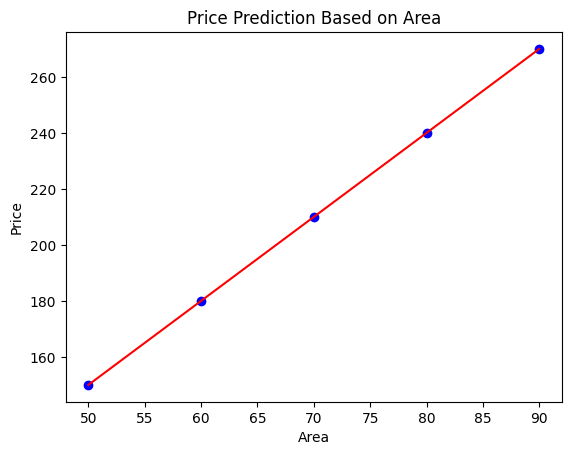

In [19]:
plt.scatter(df['area'], df['price'], color='blue')
plt.plot(df['area'], model.predict(df[['area']]), color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price Prediction Based on Area')
plt.show()

# **Classification**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [21]:
# Sample dataset
data = {
    'temperature': [36.5, 38.2, 37.0, 39.1, 36.8, 38.5, 37.5, 36.7],
    'heart_rate': [72, 110, 78, 120, 75, 115, 80, 74],
    'sick': [0, 1, 0, 1, 0, 1, 0, 0]
}

df = pd.DataFrame(data)



In [22]:
# Split into features (X) and target (y)
X = df[['temperature', 'heart_rate']]
y = df['sick']


In [23]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [24]:
# Train the classification model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [25]:
# Predict on test set
y_pred = model.predict(X_test)



In [26]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [27]:

# Predict for a new person
new_data = [[38.0, 112]]  # fever and high heart rate
prediction = model.predict(new_data)
print("Sick" if prediction[0] == 1 else "Healthy")

Sick


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


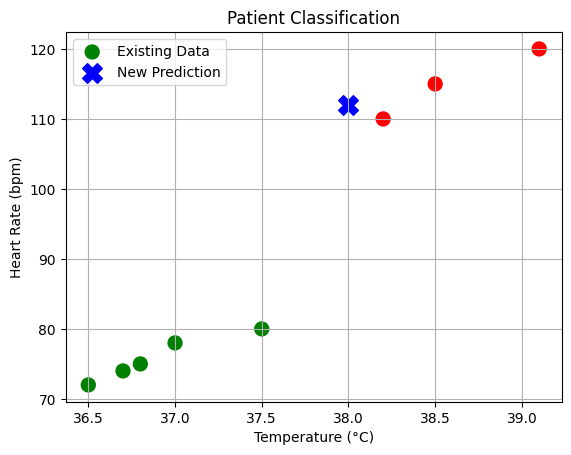

In [28]:
colors = ['green' if label == 0 else 'red' for label in y]
plt.scatter(df['temperature'], df['heart_rate'], c=colors, label='Existing Data', s=100)

plt.scatter(38.0, 112, color='blue', label='New Prediction', marker='X', s=200)

plt.xlabel('Temperature (°C)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Patient Classification')
plt.legend()
plt.grid(True)
plt.show()

# **project(1) on Regression and Classification**

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

In [30]:
data = pd.DataFrame({
    'study_hours': [10, 5, 7, 4, 9, 2, 8],
    'attendance': [90, 60, 80, 40, 85, 30, 88],
    'previous_scores': [78, 55, 65, 50, 75, 40, 70],
    'participation': [3, 1, 2, 1, 2, 1, 3],
    'final_score': [85, 50, 70, 45, 80, 35, 78],
    'passed': [1, 0, 1, 0, 1, 0, 1]
})

In [32]:
features = ['study_hours', 'attendance', 'previous_scores', 'participation']

X = data[features]
y_reg = data['final_score']
y_cls = data['passed']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.3, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_cls, test_size=0.3, random_state=42)

In [40]:
reg_model = LinearRegression()
reg_model.fit(X_train_r, y_train_r)
reg_preds = reg_model.predict(X_test_r)

mse = mean_squared_error(y_test_r, reg_preds)
rmse = np.sqrt(mse)

print("📈 Regression - RMSE:", rmse)

📈 Regression - RMSE: 2.742618455165958


In [41]:
cls_model = LogisticRegression()
cls_model.fit(X_train_c, y_train_c)
cls_preds = cls_model.predict(X_test_c)

print("📊 Classification - Accuracy:", accuracy_score(y_test_c, cls_preds))

📊 Classification - Accuracy: 1.0


# **project(2) on Regression and Classification**

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [78]:
np.random.seed(42)

study_hours = np.random.randint(1, 12, 50)
attendance = np.random.randint(30, 95, 50)
previous_scores = np.random.randint(40, 80, 50)
participation = np.random.randint(1, 4, 50)

final_score = study_hours * 0.8 + attendance * 0.1 + previous_scores * 0.1 + np.random.normal(0, 5, 50)

passed = np.random.choice([0, 1], size=50, p=[0.4, 0.6])

data = pd.DataFrame({
    'study_hours': study_hours,
    'attendance': attendance,
    'previous_scores': previous_scores,
    'participation': participation,
    'final_score': final_score,
    'passed': passed
})

print(data['passed'].value_counts())


passed
1    32
0    18
Name: count, dtype: int64


In [79]:
X = data[['study_hours', 'attendance', 'previous_scores', 'participation']]
y = data['passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(y_train.value_counts())


passed
1    22
0    13
Name: count, dtype: int64


In [81]:
cls_model_rf = RandomForestClassifier(random_state=42)
cls_model_rf.fit(X_train, y_train)
cls_preds_rf = cls_model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, cls_preds_rf)
print(f"📊 Random Forest - Accuracy: {accuracy_rf}")


📊 Random Forest - Accuracy: 0.5333333333333333
